# Домашняя работа №3 (machine learning)



Описание задания:

Решить задачу классификации при помощи обучения модели логистической регрессии.

Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall.

Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

Этапы работы:

1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9. Сформулируйте выводы по проделанной работе:

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

РЕШЕНИЕ:

# 1. Преобразование данных

In [1]:
# Загрузка файла с данными из Google Disc
# Образец (нужно оставить только имя в ссылке, перед ней uc?id = .... после нее через опцию -O имя файла)
#!wget 'https://drive.google.com/uc?id=1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF' -O affair_data.csv


!wget 'https://drive.google.com/uc?id=15-k4ay7cNY5DUqBGL64sIyuBfd-fMPYP' -O athletes.csv


--2024-03-19 20:05:49--  https://drive.google.com/uc?id=15-k4ay7cNY5DUqBGL64sIyuBfd-fMPYP
Resolving drive.google.com (drive.google.com)... 64.233.188.113, 64.233.188.100, 64.233.188.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15-k4ay7cNY5DUqBGL64sIyuBfd-fMPYP [following]
--2024-03-19 20:05:49--  https://drive.usercontent.google.com/download?id=15-k4ay7cNY5DUqBGL64sIyuBfd-fMPYP
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 764969 (747K) [application/octet-stream]
Saving to: ‘athletes.csv’

athletes.csv        100%[===================>] 747.04K  --.-KB/s    in 0.006s  

2024-03-19 20:05:50 (115 MB/s) -

In [2]:
# Данные

import pandas as pd
import numpy as np

data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
# Удаляем пропуски, так как обьектов достаточно много и не просматривается возможность корректно восстановить
# данные по росту и весу спортсменов средними значениями

df = data[~ (data['height'].isnull() | data['weight'].isnull() | data['dob'].isnull())]
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
# Закодируем категориальные переменные числовыми значениями
# через LabelEncoder(), OneHotEncoder()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [7]:
X_cat = df[['nationality', 'sport']]

In [8]:
X_cat_data = ohe.fit_transform(X_cat).toarray()
X_cat_data.shape

(10858, 227)

In [9]:
X_num = df[['height', 'weight', 'gold', 'silver', 'bronze']]
X_num_data = X_num.to_numpy()
X_num_data

array([[  1.72,  64.  ,   0.  ,   0.  ,   0.  ],
       [  1.68,  56.  ,   0.  ,   0.  ,   0.  ],
       [  1.98,  79.  ,   0.  ,   0.  ,   1.  ],
       ...,
       [  1.85, 100.  ,   0.  ,   0.  ,   0.  ],
       [  1.6 ,  56.  ,   0.  ,   0.  ,   0.  ],
       [  1.85,  70.  ,   0.  ,   0.  ,   0.  ]])

In [10]:
# Нормируем признаки height, weight

# Height
X01 = X_num_data[:, 0]

x_mean0 = X01.mean()
x_std0 = X01.std()

X02 = (X01 - x_mean0)/x_std0


In [11]:
# Weight
X11 = X_num_data[:, 1]

x_mean1 = X11.mean()
x_std1 = X11.std()

X12 = (X11 - x_mean1)/x_std1

In [12]:
# Соединяем числовые признаки после нормировки
X_num = np.c_[X02, X12, X_num_data[:,2:5]]
X_num.shape

(10858, 5)

In [13]:
# Общий массив признаков (числовые и категориальные)
X_data = np.c_[X_num, X_cat_data]
X_data

array([[-0.41502931, -0.49938796,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.76867955, -0.99438802,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.88369727,  0.42873716,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.73433398,  1.72811233,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.47598003, -0.99438802,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73433398, -0.12813791,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [14]:
X_data.shape

(10858, 232)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit( df['sex'] )

LabelEncoder()

In [17]:
Y = pd.Series(data = le.transform( df['sex']))

In [18]:
X = pd.DataFrame(data = X_data)


# 2. Разделение выборки на обучающую и тестовую

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
predictions = model.predict_proba(X_test)
predictions

array([[0.0753222 , 0.9246778 ],
       [0.55105929, 0.44894071],
       [0.1058492 , 0.8941508 ],
       ...,
       [0.60919241, 0.39080759],
       [0.87129864, 0.12870136],
       [0.00918833, 0.99081167]])

In [25]:
model.score(X_train, Y_train)

0.8421597973750864

In [26]:
model.score(X_test, Y_test)

0.8402394106813996

# 3. ROC - curve из библиотеки sklearn

In [27]:
from matplotlib import pyplot as plt

In [28]:
# ROC-кривая (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [29]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [30]:
# Убираем данные для значения порога вероятности 1.92 (?)
fpr1 = fpr[1:]
tpr1 = tpr[1:]
thres1 = thres[1:]


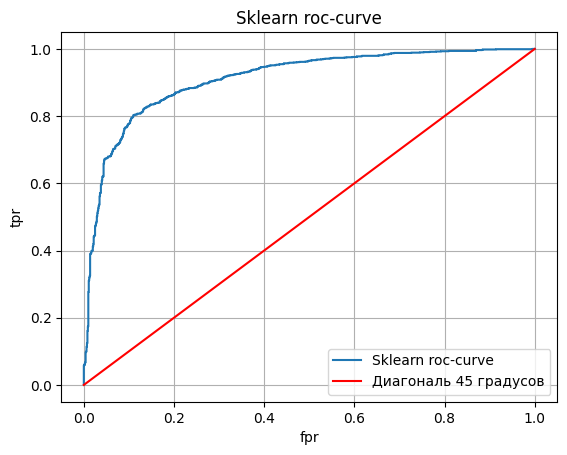

In [35]:
plt.title('Sklearn roc-curve' )
plt.plot(fpr1, tpr1, label = 'Sklearn roc-curve')

plt.plot([0.0, 1.0], [0.0, 1.0], c = 'r', label = 'Диагональ 45 градусов')

plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.grid()

# 4.     Метрика ROC - AUC score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(Y_test, predictions[:, 1])

0.91128380314359

# 5. Подсчет метрик FPR, TPR вручную на основе оптимальных весовых коэффициентов у признаков (после градиентного спуска в модели логистической регрессии). FPR, TPR определяется для  каждого порогового значения вероятности отнесения к перому классу

In [ ]:
# Обучение на тестовых данных

X = X_train
Y = Y_train
XY = np.c_[X,Y]

df = pd.DataFrame(data=XY)

# Задаем значения таргета y1, y2  c которыми будем работать
y1 = 0
y2 = 1

# Параметры
# Фиксируем зерно генератора случайного числа
my_random_seed = 42

# Коэффициент запоминания предыдущего значения
# в оценке функции потерь при стохастическом градиентном спуске
# mem - memory_exponential_mean

Lmem = 0.5

# Список весовых коэффициентов по итерациям
Wlist = []

# Шаг градиентного спуска
learning_rate = 0.8

# Количество итераций градиентного спуска
epochs = 3

# Шаг отрисовки результатов итераций
iter_print_step = 1

# Импульс Нестерова
# (коэффициент инерции от предыдущего смещения весовых коэффициентов)
# (W1 - W0)
Lnesterov = 0.2

# Начальный порог вероятности для классификации обьектов
threshold_ = 0.5

In [ ]:
import math

def sigma(z):

      res = 1/(1+(math.e)**(-z))
      return res


In [ ]:
class Model_LogRegression():


    def __init__(self, X, Y, my_random_seed):

        """ X - признаки (numpy), Y - целевые значения (numpy)"""

        #import numpy as np
        #import pandas as pd

        self.rand_seed = my_random_seed

        e = np.ones((len(X),1))
        X_ = np.c_[e,X]

        self.X = X_
        self.Y = Y
        self.XY = np.c_[X_,Y]

        df_main = pd.DataFrame(data = self.XY)

        # Корневой дата-фрейм исходных данных (не меняется)
        self.XY_df = df_main
        self.XY_data = np.c_[X,Y]

        # Рабочий текущий дата-фрейм в начальном положении
        self.df = df_main

        b = self.df
        self.Yindex = len(b.columns)-1

        # Количество признаков (весов) и обьектов X
        self.lenW = len(b.columns)-1
        self.lenX = len(X)

        # Функция потерь стохастического градиентного спуска
        self.Q_ = 0

        # Число итераций градиентного спуска
        self.iteration = 0


    # Отбираем строки, где таргет равен или y1 или y2
    def filter_two_target_values(self):
        """ Для исследования оставляем два класса y1, y2 """


        # Фильтрация по значениям y1, y2
        b = self.df
        c = b[  (b[b.columns[len(b.columns)-1]] == y1)  |
                (b[b.columns[len(b.columns)-1]] == y2)
            ]

        # Результат: обновление self.df
        self.df = c
        self.lenX = len(c)


    # Преобразование значений таргетных переменных к 0 и 1
    def target_binarize(self):

            """ Значения таргетов y1,y2 преобразуем в бинарные 0 и 1 """

            a = self.df

            # Отделяем X перед бинаризацией
            Xbin_df = a.drop(a.columns[len(a.columns)-1], axis=1)
            Xbin = Xbin_df.to_numpy()

            # Функция замены таргета на 0 и 1

            def target_bin(row):

                if row[len(a.columns)-1] in [min(y1,y2)]:
                    return int(0)

                else:
                    return int(1)

            # Прогон функцией по строкам дата-фрейма

            Ybin_df = a.apply(target_bin, axis=1) # новый бинарный столбец Y
            Ybin = Ybin_df.to_numpy()

            # Результат: ИЗМЕНЕНИЕ КОРНЕВЫХ X,Y
            # остались 2 таргета, их значения приведены к 0 и 1

            self.X = Xbin
            self.Y = Ybin
            self.XY = np.c_[Xbin, Ybin]
            self.XY_data = np.c_[Xbin, Ybin]

            main_df = pd.DataFrame(data = self.XY)

            self.df = main_df
            self.XY_df = main_df


    # Задаем начальное значение весов при каждом признаке
    def init_W0(self):

          b = self.df
          rand_seed = self.rand_seed

          np.random.seed(rand_seed)

          W0 = np.random.normal(size = (len(b.columns)-1,))

          self.W = W0

          normaW = np.linalg.norm(W0)
          self.normaW = normaW

          self.Wold = W0

    # Обогащение данных скалярным произведением вектора весов на Xi
    # Вероятность принадлежности Xi к классу y[i] =1
    # Прогноз таргета на основе этой вероятности
    def estimation(self, threshold_):

          """ Обогащение массива данных
          1. матричным произведением весов на вектор X[i]
          2. вероятность принадлежности к классу 1 ( Y[i] = 1) через сигмоиду( Xi @ W)
          3. прогноз класса на основе этой вероятности """

          # 1-1. Функция скалярного произведения весов на Xi

          b = self.df
          W = self.W

          def WXi(row):

              WXi = sum([(W[i]*row[i]) for i in range(len(b.columns)-1)])
              return WXi

          # 1-2. Построчное применение (WXi)

          WXi_df = b.apply(WXi, axis=1) # кортеж оценок - столбец
          wx = WXi_df.to_numpy()

          # 1-3. Обновление базовых свойств обьекта X,Y

          XY = self.XY
          self.data_ = np.c_[XY, wx]
          self.df = pd.DataFrame(data = self.data_)

          b= self.df
          self.WXindex = len(b.columns)-1

          # 2-1. Функция расчета вероятности через сигмоиду

          b = self.df

          def sigma_WXi(row):

                sig = sigma(row[len(b.columns)-1])
                if sig > 0.99999:
                  sig = 0.99999

                if sig < 0.00001:
                  sig = 0.00001

                return sig

          # 2-2. Построчное применение (sigma_WXi)

          proba_i_df = b.apply(sigma_WXi, axis =1)
          proba_i = proba_i_df.to_numpy()

          # 2-3. Обновление базовых свойств обьекта

          data_ = self.data_
          self.data_ = np.c_[data_, proba_i]
          self.df = pd.DataFrame(data = self.data_)

          b = self.df
          self.proba_index = len(b.columns)-1

          # 3-1. Функция прогноза класса целевой переменной

          b = self.df

          def my_target(row):

              proba_i = row[len(b.columns)-1]

              if proba_i > threshold_:
                  return float(1)
              else:
                  return float(0)

          # 3-2. Построчное применение (my_target)

          my_y_df = b.apply(my_target, axis =1)
          my_y = my_y_df.to_numpy()

          #3-3. Обновление базовых свойств обьекта

          data_ = self.data_
          self.data_ = np.c_[data_, my_y]
          self.df = pd.DataFrame(data = self.data_)

          b = self.df
          self.my_class_index = len(b.columns)-1


    def filter_y1_y2(self):
        """ Отбираем два класса y1, y2 для оценки,
         размечаем их как 0 и 1
         инициализируем начальные случайные веса
         обогащаем для каждого Xi, значением WXi, proba_i, прогноз класса y"""

        self.filter_two_target_values()
        self.target_binarize()
        self.init_W0()
        self.estimation()


    def accuracy_func(self):

        b1 = self.XY_df
        self.df = b1

        data_main = self.XY_data
        self.XY = data_main
        self.data_ = data_main

        self.estimation(threshold_)
        self.metrics()

        # здесь можно извлечь точность модели и ошибки
        # классификации
        # ------------


    def metrics(self):

        b = self.df
        Yindex = self.Yindex
        myclass_index = self.my_class_index
        proba_index = self.proba_index

        b_ = b.iloc[:, 0: myclass_index+1]
        df_wrong = (b_[ b_[Yindex] != b_[myclass_index]])

        self.df_wrong = df_wrong
        self.len_wrong = len(df_wrong)

        self.accuracy = 1 - len(df_wrong)/len(b)

        W = self.W
        normaW = np.linalg.norm(W)
        self.normaW = normaW

    # Выбор случайного Xi для стохастического градиента
    def filter_i(self):

        # Выбираем случайный обьект i

        b = self.df
        lenX = self.lenX
        Yindex = self.Yindex

        i = np.random.randint(lenX)

        # Оставляем в дата-фрейме только строку с номером i
        # и убираем столбцы - производные полного градиента

        b_1 = b.iloc[[i], 0: Yindex + 1]
        b_ = b_1.copy()

        self.df = b_

        b_data = b_.to_numpy()

        self.data_ = b_data
        self.XY = b_data


    # Функция потерь по всей выборке
    def cost_function(self):
      """ Возвращает число - функцию потерь для данных весов
      """

      d = self.df

      Yind = self.Yindex
      proba = self.proba_index

      res = (-1)* (np.sum(np.log(d[d[Yind] == 1][proba])) + \
             np.sum(np.log(1-d[d[Yind] == 0][proba])))/d.shape[0]

      self.logloss = res

    # Частная производная по j - весовому коэффициенту
    def derivative_cost_func(self,j):
        """ Формирует вектор размерности len(Y),
        состоящий из части суммы, зависящей от Xi в общей частной производной
        функции потерь по j-весу
        """

        b = self.df
        Yindex = self.Yindex
        WXindex = self.WXindex
        proba_index = self.proba_index
        jj = j

        # 4-1. Частная производная функции потерь  по коэффициенту весов Wj (при Xj)
        def der_cost_function_ij(row):

              # Производная суммы равна сумме производных из двух частей под знаком суммы

              # Если y[i] = 1, то первый множитель суммы (производная от ln(sigma(W*Xi))
              i_part_1 = 1/row[proba_index]

              # Если y[i] = 0, то первый множитель суммы (производная от ln(1-sigma(W*Xi))
              i_part_2 = (-1)/(1-row[proba_index])

              # Дифференцирование сложной функции, умножаем первую изменяемую часть на
              # частную производную сигмоидной функции sigma(W*Xi) по Wj (получена при дифференцировании аналитически)

              der_sigma_ij = (math.e)**(-row[WXindex]) * row[jj] / (((1 + (math.e)**(- row[WXindex])))**2)


              if row[Yindex] == 1:
                    i_part = i_part_1 * der_sigma_ij
              else:
                    i_part = i_part_2 * der_sigma_ij

              return i_part

        # 4-2. Построчное применение функции (вычисление частной производной для j признака, слагаемое в i - строке)

        der_j_df = b.apply(der_cost_function_ij, axis = 1)
        der_j = der_j_df.to_numpy()

        # 4-3. Обновление базовых свойств объекта

        data_ = self.data_
        self.data_ = np.c_[data_, der_j]
        self.df = pd.DataFrame(data = self.data_)

    # Цикл для вычисления всех столбцов - частных производных
    def derivatives(self):

        for j in range(self.lenW):
            self.derivative_cost_func(j)

    # Вектор градиент - сумма по столбцу (для всех Xi) по каждой частной производной
    def grad_logloss(self):
        """ Сумма по столбцам частных производных
        определяет вектор градиент
        """

        b = self.df
        num_W = self.lenW
        lenX = self.lenX

        # Индекс столбца перед столбцом с производными + 1
        _ = self.my_class_index + 1

        der_cost_func_list = []

        for w in range(num_W):

          der_j = sum(b[_+ w])  * (-1) / lenX

          der_cost_func_list.append(der_j)

        self.gr_logloss = der_cost_func_list


    def exponent_mean_cost_func(self):

        Q1 = self.Q_
        Q2 = self.logloss

        Q_ = Lmem * Q1 + (1 - Lmem) * Q2
        self.Q_ = Q_

    def weights_perspective(self):

        W0 = self.Wold
        W1 = self.W

        Wnesterov = (W1-W0)*Lnesterov + W1

        self.W = Wnesterov


    def weights_real(self):


        W0 = self.Wold
        Wnest = self.W

        lenW = self.lenW

        self.Wold = Wnest

        grad_nesterov = self.gr_logloss

        for j in range(lenW):
            #W[j] = W[j] - learning_rate*grad[j]

            Wnest[j] = Wnest[j] + (-1)* learning_rate* grad_nesterov[j]* (1-Lnesterov)


        self.W = Wnest

        i = self.iteration
        self.iteration = i+1

    def data_back_to_XY(self):

        b = self.XY_df
        data_ = self.XY_data

        self.df = b
        self.data_ = data_


    def stochastic_iteration(self):

          #self.accuracy_func()
          self.weights_perspective()
          self.filter_i()
          self.estimation(threshold_)
          self.cost_function()
          self.derivatives()
          self.grad_logloss()
          self.exponent_mean_cost_func()
          self.weights_real()
          self.data_back_to_XY()


    def full_gradient_iteration(self):
          self.accuracy_func()
          self.weights_perspective()


          self.cost_function()
          self.derivatives()
          self.grad_logloss()

          self.weights_real()


    def stochastic_way_down(self):

        for _ in range(epochs):

            self.stochastic_iteration()

            if _ % iter_print_step == 0:

              self.accuracy_func()
              print('Итерация:', self.iteration, "Точность: ", self.accuracy, "Функция потерь:", self.logloss, "Норма W:", self.normaW )


    def full_gradient_way_down(self):

        for _ in range(epochs):
            self.full_gradient_iteration()

            if _ % iter_print_step == 0:
              print('Итерация: ', self.iteration, 'Точность: ', self.accuracy, 'Функция потерь:', self.logloss, "Норма W:", self.normaW)
              print('Ошибки классификации:', self.len_wrong)


    def publish_results(self):

        print('Момент Нестерова:', Lnesterov)
        print('Learning_rate:', learning_rate)
        print('Итерация:', self.iteration)
        print('Норма W:', self.normaW)
        print('Точность классификации', self.accuracy)
        #print("Весовые коэффициенты", self.W)
        print("Ошибки классификации:" )
        print(self.len_wrong)



In [ ]:
c1 = Model_LogRegression(X, Y, my_random_seed)

c1.filter_two_target_values()
c1.target_binarize()
c1.init_W0()


In [ ]:
# Улучшенные весовые коэффициенты, полученные после градиентного спуска
# для иллюстрации подаем их на вход модели

w00 = np.array([ 0.05898126, 1.03807098, 1.46685443, 0.95720522, -0.32591293, -0.28101964, \
                 1.57775766, 0.76505242, -0.39691758, 0.53666674, -0.48529002, -0.46014336, \
                  0.27408521, -1.87612055, -1.72190524, -0.56081144, -0.92063206, 0.29060453, \
                  -0.87370632, -1.39887223, 1.46564877, -0.2300557 , 0.07090418, -1.28511064, \
                  -0.54492449, 0.10860349, -1.15179091, 0.37457092, -0.60120779, -0.32632256, \
                  -0.59324145, 1.85312149, -0.01252167, -1.00889932, 0.82512326, -1.19872834, \
                  0.2061257 , -1.95595767, -1.32021364, 0.07254245, 0.73744775, 0.17556229, \
                  -0.11382107, -0.26508028, -1.42255601, -0.72091656, -0.47849026, 1.05683521, \
                  0.33673644, -1.59252499, 0.32698282, -0.38692748, -0.66780519, 0.59339052, \
                  1.0147394 , 0.92487082, -0.8040633, -0.31499881, 0.3387572, 0.97275529, \
                  -0.44627495, -0.1602864, -0.99997134, -1.1885134, 0.8132847, 1.15950752,\
                  -0.0758332 , 1.00830565, 0.37932222, -0.63390103, 0.29170278, 1.5371677 ,\
                  -0.03545089, 1.26573203, -2.61771377, 0.81071463, 0.08979809, -0.36599428, \
                  0.09036289, -1.91306424, -0.21859089, 0.37986213, 1.47288279, -0.51624213,\
                  -0.8066298 , -0.49568097, 0.88817169, 0.34592417, -0.53542624, 0.50314051,\
                  0.13164535, 0.96908807, -0.66017658, -0.27937623, -0.3673641 , -1.46678891, \
                  0.29971538, 0.26206557, -0.01052017, -0.2380724 , -1.40976416, -0.41273901, \
                  -0.13659789, -0.76836976, -0.09913065, 0.41335023, 1.88604395, 0.16032494, \
                  0.2496457, -0.0643674, -1.90721291, -0.0362472 , 0.06219617, 2.45894806, \
                  -0.19038894, 0.30181939, -0.03517363, -1.14260818, 1.14034606, 0.74903475, \
                  0.79719663, -0.89162888, 1.40248584, -1.38764084, 0.60437472, 2.15077588, \
                  -0.98803734, -0.5656287, 0.09956632, -0.4996453, -1.54737027, 0.07230415, \
                  -1.05116201, 0.46934539, -0.91696395, 1.54915887, -0.7825476, -0.31987778,\
                  0.60315396, -1.22083289, 0.20864876, 1.30431288, -1.60329646, 0.1887, 0.17881092,\
                  0.78037104, -1.23606936, -1.31767693, 0.52040339, 0.32121113, 0.25343533, 0.34663459,\
                  -0.67604278, 0.24234675, 0.22012487, -0.63460045, 1.84629585, 0.44284656, -1.15062042,
                  0.65511925, -0.98044609, 0.78802417, 0.93757622, -0.81752558, 0.96517729, 0.38236201,
                  0.82554142, 1.86614361, -0.23788645, -0.73639743, -0.88620836, -0.81618527, -0.12744626,\
                  0.34800961, 0.27800146, 0.83010858, 0.1622823, 1.39077683, -0.26389929, 2.66906601, \
                  0.50218639, -0.85640604, -1.07084296, 0.48356943, -0.22186717, 0.69515459, 0.47156255,\
                -0.07823453, -0.84679372, -1.47292251, -0.43765794, 0.84918587, 0.18361754, -1.24343916, \
                  0.17685428, 0.25913544, -0.87143747, -0.12946824, 0.06897259, -1.13711235, 0.37714602, \
                  0.55985368, 1.08184677, 1.05412109, -1.37107345, -0.93178465, 0.19666785, 0.49587917, \
                  0.68513319, 3.59927635, 0.24184717, 1.05478704, 1.0013016 , 0.69014787, -0.28135955,\
                  0.78501117, -0.70175041, -0.03048065, -0.63871838, 0.12741157, 2.0575646, -1.76710787,\
                  0.40389959, -1.49157481, -0.33109173, 1.0426412 , 0.14352325, -1.02301541, -0.66077973,\
                  0.69711004, -0.92456609, 0.31651276, 0.23346313])


In [ ]:
# Градиентный спуск (продолжительность 3 мин 5 сек)

# Передаем w00 в модель в качестве начальных весов
c1.Wold = w00
c1.W = w00

c1.full_gradient_way_down()
c1.publish_results()

Итерация:  1 Точность:  0.7614552152889708 Функция потерь: 0.5261898695086292 Норма W: 14.304497627699392
Ошибки классификации: 2072
Итерация:  2 Точность:  0.7614552152889708 Функция потерь: 0.5256350352171851 Норма W: 14.299165201569346
Ошибки классификации: 2072
Итерация:  3 Точность:  0.7615703430808197 Функция потерь: 0.5250840467231012 Норма W: 14.293856669777654
Ошибки классификации: 2071
Момент Нестерова: 0.2
Learning_rate: 0.8
Итерация: 3
Норма W: 14.293856669777654
Точность классификации 0.7615703430808197
Ошибки классификации:
2071


In [ ]:
# Проверка модели на тесте
X = X_test
Y = Y_test
XY = np.c_[X,Y]

df = pd.DataFrame(data=XY)


In [ ]:
# Инициализация модели с весовыми коэффициентами w00, на вход подаем тестовые данные
# без оптимизации

c2 = Model_LogRegression(X,Y, my_random_seed)

c2.filter_two_target_values()
c2.target_binarize()
c2.W = w00

# Расчет вероятностей для каждого Xi*W00
c2.accuracy_func()


In [ ]:
print('Ошибки классификации на тесте:', c2.len_wrong)
print('Точность на тесте:', c2.accuracy)

Ошибки классификации на тесте: 511
Точность на тесте: 0.7647329650092081


In [ ]:
# Массив X,Y + столбцы W00 * Xi, proba_i, my_class_i
test_df = c2.df
test_df

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
0,1.0,1.087984,0.366862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.045658,0.885508,1.0
1,1.0,-0.503442,-0.746888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140670,0.535109,1.0
2,1.0,0.292271,0.057487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.808582,0.978302,1.0
3,1.0,1.618460,2.037487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.785348,0.996937,1.0
4,1.0,-1.652805,0.861862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.592171,0.643863,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,1.0,0.292271,-0.313763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.390506,0.596404,1.0
2168,1.0,-0.591854,0.243112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.083906,0.479036,0.0
2169,1.0,-0.326617,-0.499388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.332792,0.582439,1.0
2170,1.0,-0.857092,-0.870638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.214058,0.228984,0.0


In [ ]:
predictions = test_df[235]


In [ ]:
# Расчет метрик precision, recall, trp, fpr
# для заданного порога вероятности (threshold_) отнесения к классу 1

def advanced_metrics(threshold_):

  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative

  #predictions = model.predict_proba(X_test)
  for predicted_prob, actual in zip(predictions, Y_test):

    if predicted_prob >= threshold_:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

  accuracy = (tp + tn)/(tp + tn + fp + fn)
  precision = tp/( tp + fp)
  recall = tp / (tp + fn)

  #Recall и tpr - одно и то же!!!
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)

  return fpr, tpr, threshold_, precision, recall

In [ ]:
# Массив пороговых вероятностей
thres_handmade = np.linspace(0.00001,0.99999, 200)


In [ ]:
# Для ручной модели
# обращаясь к функции advanced_metrics
# вычисляем значения метрик(fpr2, trp2)
# при различных порогах  thres

# Начальные массивы из одного нулевого элемента
fpr2_ = np.zeros(1)
tpr2_ = np.zeros(1)
thres_ = np.zeros(1)

precision_ = np.zeros(1)
recall_ = np.zeros(1)

for i, el in enumerate(thres_handmade):

  fpr2, tpr2, thres2, precision2, recall2 = advanced_metrics(el)

  fpr2_ = np.append(fpr2_, fpr2)
  tpr2_ = np.append(tpr2_, tpr2)
  thres_ = np.append(thres_, thres2)

  precision_ = np.append(precision_, precision2)
  recall_ = np.append(recall_, recall2)

fpr2_ = fpr2_[1:]
tpr2_ = tpr2_[1:]
thres_ = thres_[1:]

precision_ = precision_[1:]
recall_ = recall_[1:]


# 6. Hand- made Rock-curve совместно с Roc-curve из sklearn

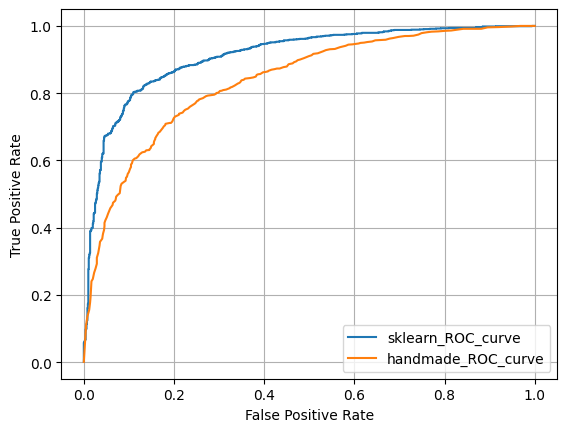

In [ ]:
plt.plot(fpr1, tpr1, label='sklearn_ROC_curve' )
plt.plot(fpr2_, tpr2_, label='handmade_ROC_curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

Вывод из cовместной диаграммы:

 Модель из sklearn предсказывает точнее на 8%, у нее площадь под кривой больше  

# 7. График Precision - Recall на основании метрик, посчитанных вручную в п.5

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
pred = model.predict(X_test)

In [ ]:
precision_score(Y_test, pred)

0.8623124448367167

In [ ]:
recall_score(Y_test, pred)

0.836472602739726

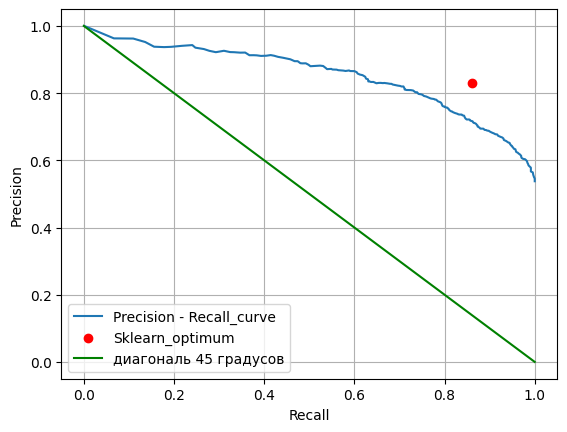

In [ ]:
# График "precision - recall" ручной модели

plt.plot(recall_, precision_, label='Precision - Recall_curve')
plt.scatter(0.86, 0.83, c = 'r', label = 'Sklearn_optimum')
plt.plot([0,1], [1,0], c = 'g', label = 'диагональ 45 градусов')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc=0)
plt.grid()
plt.show()

1. В качестве оптимума моделью sklearn используется точка (0.86, 0.83), которая соответствует конкретному значению вероятности p0, выше которой обьект классифицируется как принадлежащий первому классу.

2. Точка (0.86, 0.83) находится на кривой precision - recall для модели из sklearn, она выше чем для "ручной" модели

# 8. ROC - AUC метрики, посчитанные вручную в п.5

*Оценивает площадь под кривой ROC *

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr2_, tpr2_)

0.837404662173225

# 9. Выводы

1. По кривой Roc можно сделать вывод о том какое будет соотношение правильных и неправильных классификаций, если, например, увеличивать свыше 50 процентов вероятность, необходимую для попадания в 1 класс). Будет меньше обьектов попадатьв первый класс, при этом вероятность неверной классификации будет стремится к 0.



2. По кривой precision - recall можно сравнить соотношение ошибок первого и второго рода при отнесении обьектов к первому классу в зависимости от пороговой вероятности.
При ее увеличении precision растет, больше обьектов попадает в класс 0, классификация этого класса становиться менее точная, false negative увеличивается, recall снижается

3. Вручную обученная модель показала точность 76 процентов и при обучении и на тесте, что видимо является средним результатом (в среднем верны 3 прогноза из 4), который можно улучшать по крайней мере до 86% как у модели sklearn

4. Весовые коэффициенты, которые по модулю больше 1 (максимум по весовым коэффициентам 3.59), связаны с более влияющими на целевую переменную признаками.
На следующем шаге можно сократить число признаков и заново оптимизировать

5. Кривая precision - recall всегда проходит выше диагонали [0,1], [1,0] потому что **false negative** и **false positive**  не могут быть одновременно больше **true positive**. В этом случае достаточно провести инверсию классификации. Кривая Roc отразится относительно диагонали, когда **false positive** и **true positive** поменяются местами